***Create dataset***

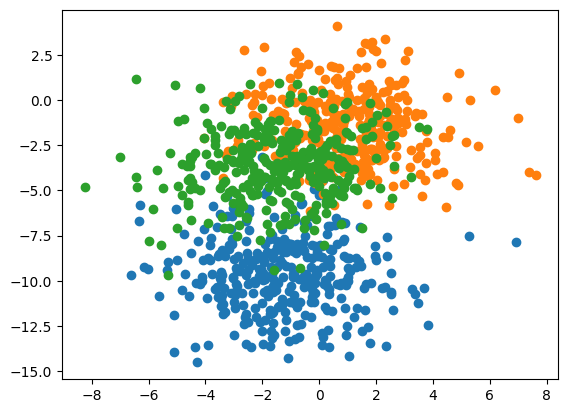

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# generate 2d classification dataset
X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
# scatter plot for each class value
for class_value in range(3):
  # select indices of points with the class label
  row_ix = np.where(y == class_value)
  plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.show()

In [7]:
X.shape, y.shape

((1000, 2), (1000,))

***Learning Rate***

Epoch 1/100
21/21 [==============================] - 2s 46ms/step - loss: 7.9529 - accuracy: 0.5687 - val_loss: 1.2644 - val_accuracy: 0.5364
Epoch 2/100
21/21 [==============================] - 0s 8ms/step - loss: 1.1136 - accuracy: 0.6104 - val_loss: 1.1876 - val_accuracy: 0.6000
Epoch 3/100
21/21 [==============================] - 0s 9ms/step - loss: 1.0040 - accuracy: 0.6119 - val_loss: 1.0296 - val_accuracy: 0.5576
Epoch 4/100
21/21 [==============================] - 0s 11ms/step - loss: 0.9429 - accuracy: 0.5836 - val_loss: 0.9665 - val_accuracy: 0.5606
Epoch 5/100
21/21 [==============================] - 0s 8ms/step - loss: 0.9284 - accuracy: 0.6403 - val_loss: 0.9221 - val_accuracy: 0.6636
Epoch 6/100
21/21 [==============================] - 0s 7ms/step - loss: 0.9284 - accuracy: 0.6328 - val_loss: 0.9773 - val_accuracy: 0.5970
Epoch 7/100
21/21 [==============================] - 0s 8ms/step - loss: 0.8251 - accuracy: 0.6612 - val_loss: 1.0997 - val_accuracy: 0.5182
Epoch 8/100

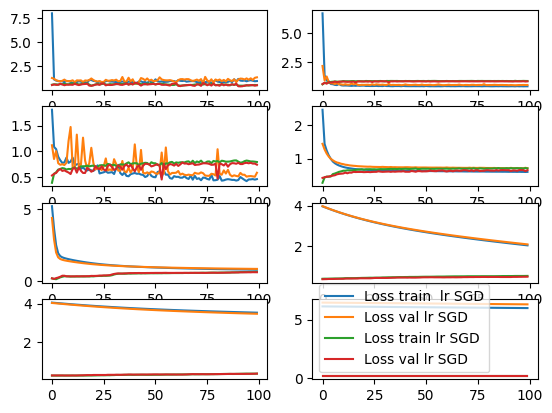

In [10]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def create_dataset():
  X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
  # one hot encode output variable
  y = to_categorical(y, num_classes=3)
  # split into train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
  return X_train, X_test, y_train, y_test

def evaluate_model(X_train, X_test, y_train, y_test, learning_rate):
  input_dim = X_train.shape[1]
  n_classes = y_train.shape[1]
  # define model
  model = Sequential()
  model.add(Dense(50, input_dim=input_dim, activation='relu', kernel_initializer="he_uniform"))
  model.add(Dense(n_classes, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=learning_rate)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  # fit model on train set
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1, batch_size=32)
  # evaluate model on test set
  _, test_acc = model.evaluate(X_test, y_test, verbose=0)
  return history, test_acc


X_train, X_test, y_train, y_test = create_dataset()
learning_rates = [1E-0, 1E-1, 1E-2, 1E-3, 1E-4, 1E-5, 1E-6, 1E-7]
for i in range(len(learning_rates)):
  # determine the plot number
  plot_no = 420 + (i+1)
  plt.subplot(plot_no)
  history, test_acc = evaluate_model(X_train, X_test, y_train, y_test, learning_rates[i])
  plt.plot(history.history['loss'], label="Loss train  lr SGD")
  plt.plot(history.history['val_loss'], label="Loss val lr SGD")
  plt.plot(history.history['accuracy'], label="Loss train lr SGD")
  plt.plot(history.history['val_accuracy'], label="Loss val lr SGD")

# show the plot
plt.legend()
plt.show()


***Momentum***

Epoch 1/100
21/21 [==============================] - 1s 14ms/step - loss: 1.2856 - accuracy: 0.5433 - val_loss: 0.8277 - val_accuracy: 0.6030
Epoch 2/100
21/21 [==============================] - 0s 5ms/step - loss: 0.7433 - accuracy: 0.6761 - val_loss: 0.8340 - val_accuracy: 0.6121
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.7070 - accuracy: 0.6761 - val_loss: 0.7687 - val_accuracy: 0.6242
Epoch 4/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6898 - accuracy: 0.6881 - val_loss: 0.7318 - val_accuracy: 0.6333
Epoch 5/100
21/21 [==============================] - 0s 4ms/step - loss: 0.7000 - accuracy: 0.6701 - val_loss: 0.7216 - val_accuracy: 0.6394
Epoch 6/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6449 - accuracy: 0.6955 - val_loss: 0.7172 - val_accuracy: 0.6576
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6321 - accuracy: 0.7119 - val_loss: 0.7191 - val_accuracy: 0.6606
Epoch 8/100


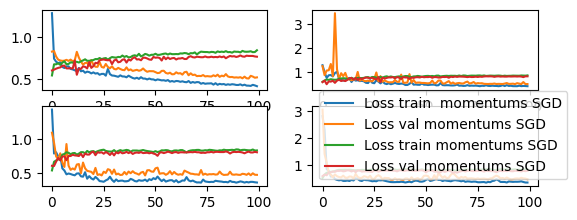

In [11]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

def create_dataset():
  X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
  # one hot encode output variable
  y = to_categorical(y, num_classes=3)
  # split into train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
  return X_train, X_test, y_train, y_test

def evaluate_model(X_train, X_test, y_train, y_test, momentum):
  input_dim = X_train.shape[1]
  n_classes = y_train.shape[1]
  # define model
  model = Sequential()
  model.add(Dense(50, input_dim=input_dim, activation='relu', kernel_initializer="he_uniform"))
  model.add(Dense(n_classes, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.01, momentum=momentum)
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  # fit model on train set
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1, batch_size=32)
  # evaluate model on test set
  _, test_acc = model.evaluate(X_test, y_test, verbose=0)
  return history, test_acc


X_train, X_test, y_train, y_test = create_dataset()
momentums = [0.0, 0.5, 0.9, 0.99]
for i in range(len(momentums)):
  # determine the plot number
  plot_no = 420 + (i+1)
  plt.subplot(plot_no)
  history, test_acc = evaluate_model(X_train, X_test, y_train, y_test, momentums[i])
  plt.plot(history.history['loss'], label="Loss train  momentums SGD")
  plt.plot(history.history['val_loss'], label="Loss val momentums SGD")
  plt.plot(history.history['accuracy'], label="Loss train momentums SGD")
  plt.plot(history.history['val_accuracy'], label="Loss val momentums SGD")

# show the plot
plt.legend()
plt.show()


***Decay***

Epoch 1/100
21/21 [==============================] - 1s 11ms/step - loss: 1.1133 - accuracy: 0.5627 - val_loss: 1.1838 - val_accuracy: 0.5333
Epoch 2/100
21/21 [==============================] - 0s 4ms/step - loss: 0.8664 - accuracy: 0.6284 - val_loss: 0.8621 - val_accuracy: 0.6182
Epoch 3/100
21/21 [==============================] - 0s 4ms/step - loss: 0.7401 - accuracy: 0.6537 - val_loss: 0.8343 - val_accuracy: 0.5939
Epoch 4/100
21/21 [==============================] - 0s 4ms/step - loss: 0.7606 - accuracy: 0.6582 - val_loss: 0.7846 - val_accuracy: 0.6121
Epoch 5/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6927 - accuracy: 0.6776 - val_loss: 0.7443 - val_accuracy: 0.6515
Epoch 6/100
21/21 [==============================] - 0s 3ms/step - loss: 0.6539 - accuracy: 0.6910 - val_loss: 0.7346 - val_accuracy: 0.6424
Epoch 7/100
21/21 [==============================] - 0s 4ms/step - loss: 0.6909 - accuracy: 0.6881 - val_loss: 0.7503 - val_accuracy: 0.6303
Epoch 8/100


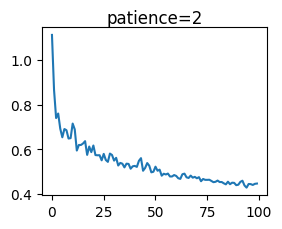

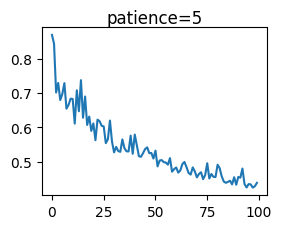

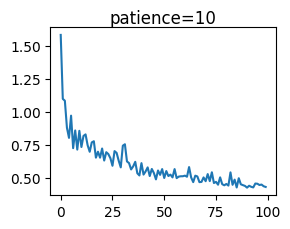

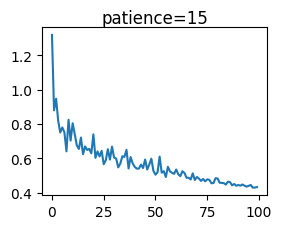

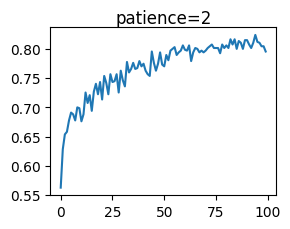

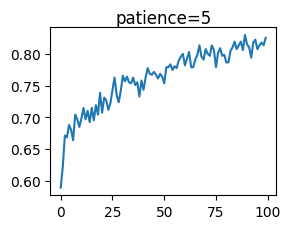

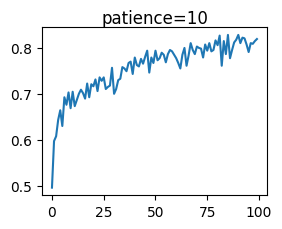

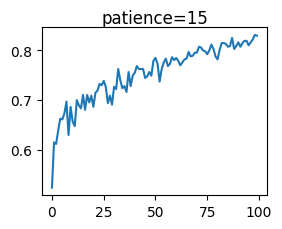

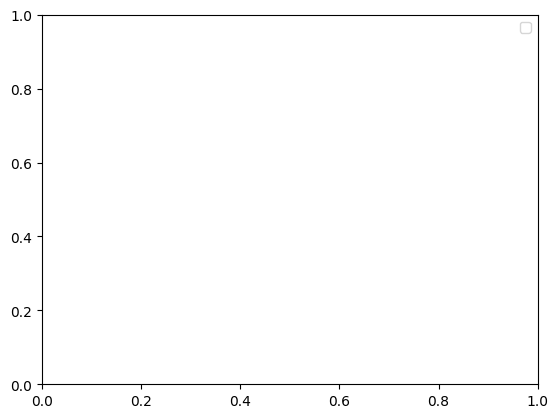

In [16]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras import backend
from keras.callbacks import Callback
from keras.callbacks import ReduceLROnPlateau
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# monitor the learning rate
class LearningRateMonitor(Callback):
  # start of training
  def on_train_begin(self, logs={}):
    self.lrates = list()

  # end of each training epoch
  def on_epoch_end(self, epoch, logs={}):
    # get and store the learning rate
    optimizer = self.model.optimizer
    lrate = float(backend.get_value(optimizer.lr))
    self.lrates.append(lrate)

def create_dataset():
  X, y = make_blobs(n_samples=1000, centers=3, n_features=2, cluster_std=2, random_state=2)
  # one hot encode output variable
  y = to_categorical(y, num_classes=3)
  # split into train and test
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
  return X_train, X_test, y_train, y_test

def evaluate_model(X_train, X_test, y_train, y_test, patience):
  input_dim = X_train.shape[1]
  n_classes = y_train.shape[1]
  # define model
  model = Sequential()
  model.add(Dense(50, input_dim=input_dim, activation='relu', kernel_initializer="he_uniform"))
  model.add(Dense(n_classes, activation='softmax'))
  # compile model
  opt = SGD(learning_rate=0.01)
  rlrp = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=patience, min_delta=1E-7)
  lrm = LearningRateMonitor()
  model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
  # fit model on train set
  history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=1, batch_size=32)
  # evaluate model on test set
  _, test_acc = model.evaluate(X_test, y_test, verbose=0)
  return history.history['loss'], history.history['accuracy']

# create line plots for a series
def line_plots(patiences, series):
  for i in range(len(patiences)):
    plt.subplot(220 + (i+1))
    plt.plot(series[i])
    plt.title('patience='+str(patiences[i]), pad=-80)
    plt.show()

X_train, X_test, y_train, y_test = create_dataset()
patiences = [2, 5, 10, 15]
lr_list, loss_list, acc_list, = list(), list(), list()
for i in range(len(patiences)):
  # fit model and plot learning curves for a patience
  loss, acc = evaluate_model(X_train, X_test, y_train, y_test, patiences[i])
  # lr_list.append(lr)
  loss_list.append(loss)
  acc_list.append(acc)
# plot learning rates
# line_plots(patiences, lr_list)
# plot loss
line_plots(patiences, loss_list)
# plot accuracy
line_plots(patiences, acc_list)

# show the plot
plt.legend()
plt.show()
